In [1]:
pip install tensorflow numpy matplotlib seaborn scikit-learn


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 650.2 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 2.6 MB/s eta 0:00:06
    --------------------------------------- 0.2/15.8 MB 3.5 MB/s eta 0:00:05
    --------------------------------------- 0.3/15.8 MB 3.9 MB/s eta 0:00:04
   - -------------------------------------- 0.4/15.8 MB 3.1 MB/s eta 0:00:06
   - --------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\jithu\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-860d95b1c38e637ce4509f5fa24fbf2a.dll'
Consider using the `--user` option or check the permissions.



In [4]:
pip install --upgrade --force-reinstall numpy --user


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/7d/10/f8850982021cb90e2ec31990291f9e830ce7d94eef432b15066e7cbe0bec/numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl (13.1 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.3.4 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.3.4 which is incompatible.
spacy 3.7.2 requires typer<0.10.0,>=0.3.0, but you have typer 0.17.4 which is incompatible.


In [5]:
# ------------------------------------------------------
# 1. Import Libraries and MNIST Dataset
# ------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
# ------------------------------------------------------
# 2. Data Preprocessing
# ------------------------------------------------------
# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to add channel dimension (reshape to 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [8]:
# ------------------------------------------------------
# 3. Build a CNN Model
# ------------------------------------------------------
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\jithu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9905 - val_loss: 0.0421
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9976 - loss: 0.0063 - val_accuracy: 0.9892 - val_loss: 0.0448
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9974 - loss: 0.0069 - val_accuracy: 0.9897 - val_loss: 0.0443
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9923 - val_loss: 0.0452
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9980 - loss: 0.0056 - val_accuracy: 0.9903 - val_loss: 0.0483
Test Accuracy: 99.06%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


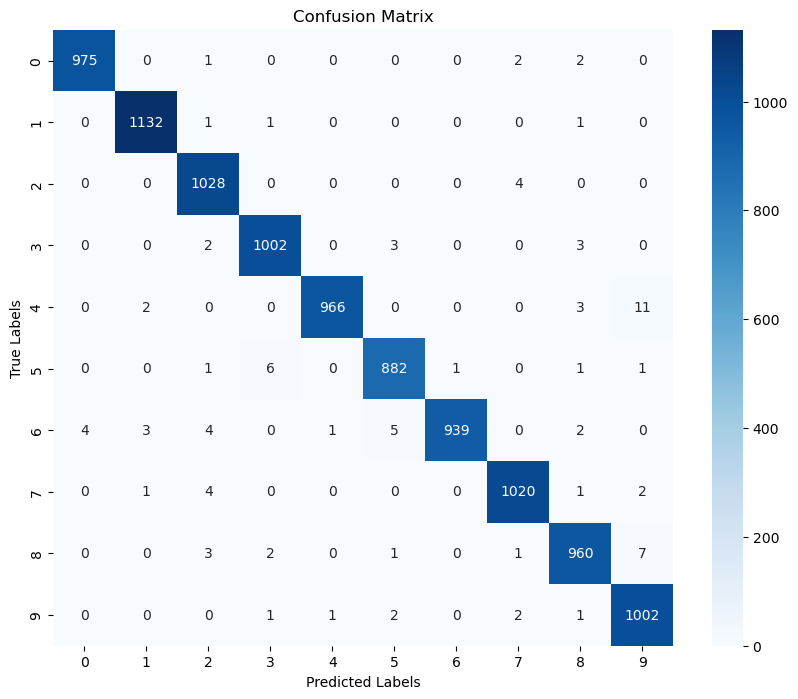

In [11]:
# ------------------------------------------------------
# 4. Train the Model
# ------------------------------------------------------
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# ------------------------------------------------------
# 5. Plot Confusion Matrix
# ------------------------------------------------------
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()